In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/Machine Learning/ml

/content/gdrive/My Drive/Machine Learning/ml


In [3]:
ls

 CAR_DETAILS.csv              Fish.csv    house.xlsx
 car_price_prediction.ipynb   house.csv  'MLLAB 2_(1).ipynb'


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#import data set
dataset= pd.read_csv('CAR_DETAILS.csv')

X= dataset.iloc[:,:-1].values
Y= dataset.iloc[:,1].values


In [6]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
dataset.shape

(4340, 8)

In [8]:
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
dataset.isnull().values.any()

False

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
df=dataset

In [12]:
print('Fuel unique values = ', df['fuel'].unique())
print('Seller type unique values = ', df['seller_type'].unique())
print('Transmission unique values = ', df['transmission'].unique())
print('Owner unique values = ', df['owner'].unique())

Fuel unique values =  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Seller type unique values =  ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission unique values =  ['Manual' 'Automatic']
Owner unique values =  ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [13]:
df["car_age"] = df["year"].apply(lambda x: 2022-x)
df.drop("year", axis=1, inplace=True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,8


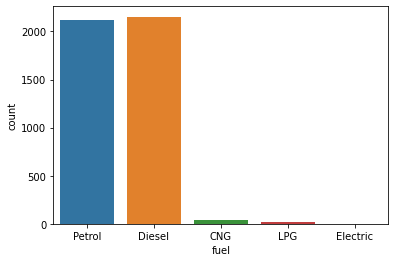

In [14]:
import seaborn as sns
sns.countplot(x="fuel", data=df)

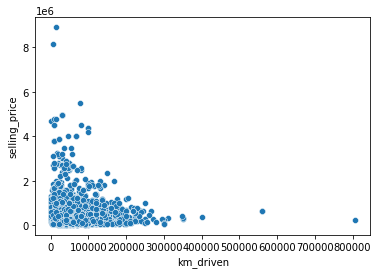

In [15]:
import matplotlib.pyplot as plt
sns.scatterplot(data = df, x = "km_driven", y = "selling_price")
plt.show()

In [16]:
df.replace(to_replace ="Manual", value =0, inplace=True)
df.replace(to_replace ="Automatic", value =1, inplace=True)
df.rename(columns={"transmission":"is_automatic"}, inplace=True)
df

,name,selling_price,km_driven,fuel,seller_type,is_automatic,owner,car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,0,First Owner,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,0,First Owner,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,0,First Owner,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,0,First Owner,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,0,Second Owner,8
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,0,Second Owner,8
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,0,Second Owner,8
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,0,Second Owner,13
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,0,First Owner,6


In [17]:
df.replace(to_replace ="First Owner", value =0, inplace=True)
df.replace(to_replace ="Second Owner", value =1, inplace=True)
df.replace(to_replace ="Third Owner", value =2, inplace=True)
df.replace(to_replace ="Fourth & Above Owner", value =3, inplace=True)
df.replace(to_replace ="Test Drive Car", value =4, inplace=True)
df

,name,selling_price,km_driven,fuel,seller_type,is_automatic,owner,car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,0,0,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,0,0,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,0,0,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,0,0,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,0,1,8
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,0,1,8
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,0,1,8
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,0,1,13
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,0,0,6


In [18]:
df2 = df.drop(["fuel","seller_type"], axis='columns')
df2

,name,selling_price,km_driven,is_automatic,owner,car_age
0,Maruti 800 AC,60000,70000,0,0,15
1,Maruti Wagon R LXI Minor,135000,50000,0,0,15
2,Hyundai Verna 1.6 SX,600000,100000,0,0,10
3,Datsun RediGO T Option,250000,46000,0,0,5
4,Honda Amaze VX i-DTEC,450000,141000,0,1,8
...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,0,1,8
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,0,1,8
4337,Maruti 800 AC BSIII,110000,83000,0,1,13
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,0,0,6


In [19]:
df["name"].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

Creating dummy variables for car model

In [ ]:
dummies = pd.get_dummies(df.name)
dummies

In [21]:
df3 = pd.concat([df2,dummies],axis='columns')

Now, Drop one column to avoid dummy variable trap

In [22]:
df4 = df3.drop(['name','Volvo XC60 D5 Inscription'], axis='columns')
df4

,selling_price,km_driven,is_automatic,owner,car_age,Ambassador CLASSIC 1500 DSL AC,Ambassador Classic 2000 Dsz,Ambassador Grand 1800 ISZ MPFI PW CL,Audi A4 1.8 TFSI,Audi A4 2.0 TDI,...,Volkswagen Vento Diesel Style Limited Edition,Volkswagen Vento Diesel Trendline,Volkswagen Vento IPL II Diesel Trendline,Volkswagen Vento Magnific 1.6 Highline,Volkswagen Vento New Diesel Highline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,Volvo V40 D3 R Design,Volvo XC 90 D5 Inscription BSIV,Volvo XC60 D3 Kinetic
0,60000,70000,0,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,135000,50000,0,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,600000,100000,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000,46000,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,450000,141000,0,1,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,0,1,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,409999,80000,0,1,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,110000,83000,0,1,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,865000,90000,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Spliting into X and Y and then using train_test_split

In [23]:
X = df4.drop(['selling_price'],axis='columns')
y = df4.selling_price
X

,km_driven,is_automatic,owner,car_age,Ambassador CLASSIC 1500 DSL AC,Ambassador Classic 2000 Dsz,Ambassador Grand 1800 ISZ MPFI PW CL,Audi A4 1.8 TFSI,Audi A4 2.0 TDI,Audi A4 2.0 TDI 177 Bhp Premium Plus,...,Volkswagen Vento Diesel Style Limited Edition,Volkswagen Vento Diesel Trendline,Volkswagen Vento IPL II Diesel Trendline,Volkswagen Vento Magnific 1.6 Highline,Volkswagen Vento New Diesel Highline,Volkswagen Vento Petrol Highline,Volkswagen Vento Petrol Highline AT,Volvo V40 D3 R Design,Volvo XC 90 D5 Inscription BSIV,Volvo XC60 D3 Kinetic
0,70000,0,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50000,0,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100000,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46000,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,141000,0,1,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,80000,0,1,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,80000,0,1,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,83000,0,1,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,90000,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [26]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.722003721973018

In [27]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=2, selection='random')
lasso_model.fit(X_train,y_train)
lasso_model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.305e+13, tolerance: 1.195e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.7739874348484836

In [28]:
def predict_price(name,km_driven,is_automatic,owner,car_age):    
    loc_index = np.where(X.columns==name)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = km_driven
    x[1] = is_automatic
    x[2] = owner
    x[3] = car_age
    if loc_index >= 0:
        x[loc_index] = 1

    return lasso_model.predict([x])[0]

In [37]:
a=input("Enter car name : ")
b=int(input("Enter km_driven : "))
c=int(input("Enter if car ismanual then 0 elif automatic then 1 : "))
d=int(input("Enter owner if first owner = 0 second = 1 third = 2 or forth or above = 3 or if test drive then type 4 : "))
e=int(input("Enter car age : "))

Enter car name : Maruti Wagon R LXI Minor
Enter km_driven : 5000
Enter if car ismanual then 0 elif automatic then 1 : 1
Enter owner if first owner = 0 second = 1 third = 2 or forth or above = 3 or if test drive then type 4 : 2
Enter car age : 15


In [38]:
predict_price(a,b,c,d,e)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


1161905.3661831426

In [ ]:
# predict_price('Maruti Wagon R LXI Minor',50000,0,1,15)